# Udacity Project - Data Wrangling And Analyze Data

## Introduction

>The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

## Gathering data

- witter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv

- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

**Additional Data via the Twitter API**

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least

In [3]:
#import the libraries we gonna use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests # for accessing the image prediction file that listed online.
import tweepy # the twitter API
from tweepy import OAuthHandler
import json
import os
import csv
import sys
import time
from timeit import default_timer as timer

In [4]:
# Gathering the twitter archive dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Gathering the Image Predictions File from a url online

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions  = pd.read_table('image_predictions.tsv', sep='\t')

In [6]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
error_list = []
df_list = []
start = time.time()

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # to see how many favorite the tweets had
        retweets = tweet['retweet_count'] # for counting the retweets
        user_followers = tweet['user']['followers_count'] # to see how many followers the user had
        user_favourites = tweet['user']['favourites_count'] # to see how many favorites the user had
        date_time = tweet['created_at'] # to see the datetime of tweet
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
end = time.time()
print(end - start)

892420643555336193 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
892177421306343426 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
891815181378084864 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
891689557279858688 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
891327558926688256 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
891087950875897856 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890971913173991426 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890729181411237888 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890609185150312448 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890240255349198849 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890006608113172480 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
889880896479866881 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
889665388333682689 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
889638837579

871515927908634625 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
871166179821445120 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
871102520638267392 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
871032628920680449 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870804317367881728 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870726314365509632 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870656317836468226 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870374049280663552 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870308999962521604 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870063196459192321 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
869988702071779329 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
869772420881756160 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
869702957897576449 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
869596645499

850753642995093505 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
850380195714523136 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
850333567704068097 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
850145622816686080 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
850019790995546112 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849776966551130114 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849668094696017920 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849412302885593088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849336543269576704 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849051919805034497 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
848690551926992896 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
848324959059550208 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
848213670039564288 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
848212111729

834086379323871233 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833863086058651648 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833826103416520705 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833732339549220864 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833722901757046785 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833479644947025920 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833124694597443584 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832998151111966721 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832769181346996225 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832757312314028032 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832682457690300417 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832645525019123713 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832636094638288896 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832397543355

820749716845686786 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820690176645140481 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820494788566847489 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820446719150292993 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820314633777061888 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820078625395449857 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820013781606658049 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819952236453363712 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819924195358416896 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819711362133872643 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819588359383371776 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819347104292290561 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819238181065359361 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819227688460

806542213899489280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
806242860592926720 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
806219024703037440 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805958939288408065 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805932879469572096 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805826884734976000 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805823200554876929 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805520635690676224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805487436403003392 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805207613751304193 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
804738756058218496 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
804475857670639616 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
804413760345620481 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
804026241225

793120401413079041 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792913359805018113 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792883833364439040 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792773781206999040 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792394556390137856 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792050063153438720 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791821351946420224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791784077045166082 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791780927877898241 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791774931465953280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791672322847637504 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791406955684368384 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791312159183634433 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791026214425

778650543019483137 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778624900596654080 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778408200802557953 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778396591732486144 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778383385161035776 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778286810187399168 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778039087836069888 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778027034220126208 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777953400541634568 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777885040357281792 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777684233540206592 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777641927919427584 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777621514455814149 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777189768882

762464539388485633 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
762316489655476224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
762035686371364864 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761976711479193600 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761750502866649088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761745352076779520 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761672994376806400 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761599872357261312 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761371037149827077 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761334018830917632 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761292947749015552 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761227390836215808 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761004547850530816 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
760893934457

750086836815486976 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750071704093859840 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750056684286914561 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750041628174217216 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750026558547456000 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750011400160841729 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749996283729883136 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749981277374128128 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749774190421639168 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749417653287129088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749403093750648834 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749395845976588288 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749317047558017024 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749075273010

738891149612572673 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738885046782832640 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738883359779196928 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738537504001953792 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738402415918125056 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738184450748633089 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738166403467907072 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738156290900254721 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737826014890496000 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737800304142471168 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737678689543020544 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737445876994609152 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737322739594330112 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737310737551

718454725339934721 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
718246886998687744 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
718234618122661888 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717841801130979328 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717790033953034240 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717537687239008257 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717428917016076293 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717421804990701568 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717047459982213120 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717009362452090881 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
716802964044845056 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
716791146589110272 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
716730379797970944 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
716447146686

707969809498152960 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707776935007539200 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707741517457260545 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707738799544082433 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707693576495472641 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707629649552134146 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707610948723478529 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707420581654872064 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707411934438625280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707387676719185920 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707377100785885184 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707315916783140866 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707297311098011648 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707059547140

699370870310113280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699323444782047232 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699088579889332224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699079609774645248 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699072405256409088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699060279947165696 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699036661657767936 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698989035503689728 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698953797952008193 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698907974262222848 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698710712454139905 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698703483621523456 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698635131305795584 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698549713696

691321916024623104 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
691096613310316544 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
691090071332753408 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690989312272396288 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690959652130045952 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690938899477221376 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690932576555528194 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690735892932222976 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690728923253055490 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690690673629138944 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690649993829576704 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690607260360429569 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690597161306841088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690400367696

684940049151070208 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684926975086034944 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684914660081053696 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684902183876321280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684880619965411328 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684830982659280897 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684800227459624960 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684594889858887680 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684588130326986752 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684567543613382656 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684538444857667585 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684481074559381504 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684460069371654144 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684241637099

679872969355714560 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679862121895714818 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679854723806179328 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679844490799091713 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679828447187857408 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679777920601223168 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679736210798047232 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679729593985699840 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679722016581222400 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679530280114372609 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679527802031484928 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679511351870550016 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679503373272485890 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679475951516

676098748976615425 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
676089483918516224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675898130735476737 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675891555769696257 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675888385639251968 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675878199931371520 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675870721063669760 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675853064436391936 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675849018447167488 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675845657354215424 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675822767435051008 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675820929667219457 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675798442703122432 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675781562965

673708611235921920 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673707060090052608 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673705679337693185 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673700254269775872 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673697980713705472 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673689733134946305 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673688752737402881 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673686845050527744 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673680198160809984 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673662677122719744 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673656262056419329 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673636718965334016 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673612854080196609 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673583129559

671486386088865792 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671485057807351808 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671390180817915904 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671362598324076544 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671357843010908160 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671355857343524864 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671347597085433856 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671186162933985280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671182547775299584 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671166507850801152 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671163268581498880 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671159727754231808 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671154572044468225 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671151324042

669567591774625800 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669564461267722241 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669393256313184256 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669375718304980992 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669371483794317312 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669367896104181761 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669363888236994561 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669359674819481600 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669354382627049472 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669353438988365824 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669351434509529089 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669328503091937280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669327207240699904 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669324657376

667517642048163840 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667509364010450944 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667502640335572993 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667495797102141441 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667491009379606528 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667470559035432960 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667455448082227200 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667453023279554560 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667443425659232256 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667437278097252352 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667435689202614272 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667405339315146752 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667393430834667520 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667369227918

In [10]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
new_tweet = twitter_archive.iloc[2]
new_tweet

tweet_id                                                     891815181378084864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-31 00:18:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891815181...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [12]:
new_tweet.text

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

In [13]:
new_tweet.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [14]:
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [16]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38148,8346,7499736,140397,2017-08-01 16:23:56
1,892177421306343426,32716,6171,7499736,140397,2017-08-01 00:17:27
2,891815181378084864,24632,4081,7499736,140397,2017-07-31 00:18:03
3,891689557279858688,41487,8490,7499736,140397,2017-07-30 15:58:51
4,891327558926688256,39662,9183,7499736,140397,2017-07-29 16:00:24
...,...,...,...,...,...,...
2337,666049248165822465,108,41,7499772,140396,2015-11-16 00:24:50
2338,666044226329800704,295,139,7499772,140396,2015-11-16 00:04:52
2339,666033412701032449,124,43,7499772,140396,2015-11-15 23:21:54
2340,666029285002620928,129,47,7499773,140396,2015-11-15 23:05:30


In [18]:
tweet_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38148,8346,7499736,140397,2017-08-01 16:23:56
1,892177421306343426,32716,6171,7499736,140397,2017-08-01 00:17:27
2,891815181378084864,24632,4081,7499736,140397,2017-07-31 00:18:03
3,891689557279858688,41487,8490,7499736,140397,2017-07-30 15:58:51
4,891327558926688256,39662,9183,7499736,140397,2017-07-29 16:00:24


In [19]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2342 non-null   int64 
 1   favorites        2342 non-null   int64 
 2   retweets         2342 non-null   int64 
 3   user_followers   2342 non-null   int64 
 4   user_favourites  2342 non-null   int64 
 5   date_time        2342 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


## Assessing Data

In [20]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [25]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
#print whole text in order to verify numerators and denominators
print(twitter_archive['text'][1120]) #17 dogs
print(twitter_archive['text'][1634]) #13 dogs
print(twitter_archive['text'][313]) #just a tweet to explain actual ratings, this will be ignored when cleaning data
print(twitter_archive['text'][189]) #no picture, this will be ignored when cleaning data
print(twitter_archive['text'][1779]) #12 dogs

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [28]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 143, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 1176, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [29]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [30]:
twitter_archive[twitter_archive['tweet_id'] == 681340665377193000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\sidhi\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [33]:
print(image_predictions.p1_dog.value_counts())
print(image_predictions.p2_dog.value_counts())
print(image_predictions.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [34]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [38]:
tweet_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38148,8346,7499736,140397,2017-08-01 16:23:56
1,892177421306343426,32716,6171,7499736,140397,2017-08-01 00:17:27
2,891815181378084864,24632,4081,7499736,140397,2017-07-31 00:18:03
3,891689557279858688,41487,8490,7499736,140397,2017-07-30 15:58:51
4,891327558926688256,39662,9183,7499736,140397,2017-07-29 16:00:24


**Quality :**

**twitter archive dataset:**
- retweeted_status_timestamp, timestamp should be datetime instead of object (string).
- tweet_id should be object(string)
- We only want original ratings "no retweets" that have images this one as a 'key point'.

**image_predictions dataste:**
- Change the name of the 'p' like "p1,p2,p3,p1_conf,p1_dog, etc..) to (prediction1, prediction2, etc..)
- Change p1 to Prediction1
- Change p2 to Prediction2
- Change p3 to Prediction3
- Change other columns that is related to the prediction such as (p1_conf, p1_dog etc...) to (Prediction_conf etc..)
- Change tweet_id to an object datatype

**tideness :**
- the dog stage has 4 stages
- Combine the datasets together.

## Cleaning

In [39]:
twitter_archive_cleaned = twitter_archive.copy()
image_predictions_cleaned = image_predictions.copy()
tweet_data_cleaned = tweet_data.copy()

**Define :**

We only want original ratings "no retweets" that have images.

**Code :**

In [40]:
twitter_archive_cleaned = twitter_archive_cleaned[pd.isnull(twitter_archive_cleaned.retweeted_status_id)]
twitter_archive_cleaned = twitter_archive_cleaned.drop('retweeted_status_id', 1)
twitter_archive_cleaned = twitter_archive_cleaned.drop('retweeted_status_user_id', 1)
twitter_archive_cleaned = twitter_archive_cleaned.drop('retweeted_status_timestamp', 1)

**Test :**

In [41]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

**Define :**

1-retweeted_status_timestamp, timestamp should be datetime instead of object (string).
2-tweet_id should be object(string).

**Code :**

In [42]:
#1-
twitter_archive_cleaned['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_cleaned.timestamp)
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned.timestamp)

#2-
twitter_archive_cleaned['tweet_id'] = twitter_archive_cleaned['tweet_id'].astype('str')

**Test :**

In [43]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   expanded_urls               2117 non-null   object             
 7   rating_numerator            2175 non-null   int64              
 8   rating_denominator          2175 non-null   int64              
 9   name                        2175 non-null   object             
 10  doggo                       2175 non-null   object          

**Define**

1-Change p1 to Prediction1
2-Change p2 to Prediction2
3-Change p3 to Prediction3
4-Change other columns that is related to the prediction such as (p1_conf, p1_dog etc...) to (Prediction_conf etc..)

**Code**

In [44]:
#1 / 2 / 3 - 
image_predictions_cleaned.rename(columns={'p1': 'Prediction1', 'p2': 'Prediction2', 'p3': 'Prediction3'}, inplace=True)

# 4 -
image_predictions_cleaned.rename(columns={'p1_conf': 'Prediction1_conf', 'p1_dog': 'Prediction1_dog'}, inplace=True)
image_predictions_cleaned.rename(columns={'p2_conf': 'Prediction2_conf', 'p2_dog': 'Prediction2_dog'}, inplace=True)
image_predictions_cleaned.rename(columns={'p3_conf': 'Prediction3_conf', 'p3_dog': 'Prediction3_dog'}, inplace=True)

**Test**

In [45]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   jpg_url           2075 non-null   object 
 2   img_num           2075 non-null   int64  
 3   Prediction1       2075 non-null   object 
 4   Prediction1_conf  2075 non-null   float64
 5   Prediction1_dog   2075 non-null   bool   
 6   Prediction2       2075 non-null   object 
 7   Prediction2_conf  2075 non-null   float64
 8   Prediction2_dog   2075 non-null   bool   
 9   Prediction3       2075 non-null   object 
 10  Prediction3_conf  2075 non-null   float64
 11  Prediction3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Define:**
    
Change tweet_id to an object datatype

**Code :**

In [46]:
image_predictions_cleaned['tweet_id'] = image_predictions_cleaned['tweet_id'].astype('str')
tweet_data_cleaned['tweet_id'] = tweet_data_cleaned['tweet_id'].astype('str')

**Test:**

In [47]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   object 
 1   jpg_url           2075 non-null   object 
 2   img_num           2075 non-null   int64  
 3   Prediction1       2075 non-null   object 
 4   Prediction1_conf  2075 non-null   float64
 5   Prediction1_dog   2075 non-null   bool   
 6   Prediction2       2075 non-null   object 
 7   Prediction2_conf  2075 non-null   float64
 8   Prediction2_dog   2075 non-null   bool   
 9   Prediction3       2075 non-null   object 
 10  Prediction3_conf  2075 non-null   float64
 11  Prediction3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [48]:
tweet_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2342 non-null   object
 1   favorites        2342 non-null   int64 
 2   retweets         2342 non-null   int64 
 3   user_followers   2342 non-null   int64 
 4   user_favourites  2342 non-null   int64 
 5   date_time        2342 non-null   object
dtypes: int64(4), object(2)
memory usage: 109.9+ KB


**Define :**

the dog stage has 4 stages.

**Code :**

In [49]:
STAGES = ['doggo', 'pupper','floofer', 'puppo']
COLUMNS = [i for i in twitter_archive_cleaned.columns.tolist() if i not in STAGES]


twitter_archive_cleaned = pd.melt(twitter_archive_cleaned, id_vars = COLUMNS, value_vars = STAGES, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
twitter_archive_cleaned = twitter_archive_cleaned.drop('stages', 1)

**Test:**

In [50]:
twitter_archive_cleaned.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweeted_status_timestamp,dog_stage
1742,674262580978937856,NaN,NaN,2015-12-08 16:21:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's super stoked about being an ...,https://twitter.com/dog_rates/status/674262580...,9,10,Gus,2015-12-08 16:21:41+00:00,None
3618,684914660081053696,NaN,NaN,2016-01-07 01:49:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",https://twitter.com/dog_rates/status/684914660...,12,10,None,2016-01-07 01:49:14+00:00,None
3831,676101918813499392,NaN,NaN,2015-12-13 18:10:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Striker. He's ready for Christmas. 11/10 ...,https://twitter.com/dog_rates/status/676101918...,11,10,Striker,2015-12-13 18:10:33+00:00,None
5464,708026248782585858,NaN,NaN,2016-03-10 20:26:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch thi...,https://twitter.com/dog_rates/status/708026248...,13,10,None,2016-03-10 20:26:26+00:00,None
4161,669367896104181761,NaN,NaN,2015-11-25 04:11:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. Chip's pretending to be choked. ...,https://twitter.com/dog_rates/status/669367896...,10,10,Chip,2015-11-25 04:11:57+00:00,None
5133,751456908746354688,NaN,NaN,2016-07-08 16:44:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper that's very hungry but too laz...,https://twitter.com/dog_rates/status/751456908...,12,10,None,2016-07-08 16:44:23+00:00,None
5659,692919143163629568,NaN,NaN,2016-01-29 03:56:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please only send in dogs. Don't submit other t...,https://twitter.com/dog_rates/status/692919143...,9,10,None,2016-01-29 03:56:12+00:00,None
505,794926597468000259,NaN,NaN,2016-11-05 15:37:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mack. He's rather h*ckin sleepy. Excep...,https://twitter.com/dog_rates/status/794926597...,12,10,Mack,2016-11-05 15:37:24+00:00,None
1635,676617503762681856,NaN,NaN,2015-12-15 04:19:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I promise this wasn't meant to be a cuteness o...,https://twitter.com/dog_rates/status/676617503...,13,10,None,2015-12-15 04:19:18+00:00,None
2497,827324948884643840,NaN,NaN,2017-02-03 01:16:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphie. He's being treated for an ove...,https://twitter.com/dog_rates/status/827324948...,12,10,Ralphie,2017-02-03 01:16:53+00:00,None


**Define :**

Combine the datasets together.

**Code:**

In [51]:
tweet_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2342 non-null   object
 1   favorites        2342 non-null   int64 
 2   retweets         2342 non-null   int64 
 3   user_followers   2342 non-null   int64 
 4   user_favourites  2342 non-null   int64 
 5   date_time        2342 non-null   object
dtypes: int64(4), object(2)
memory usage: 109.9+ KB


In [52]:
twitter_data = pd.merge(left=twitter_archive_cleaned,
                                 right=tweet_data_cleaned, left_on='tweet_id', right_on='tweet_id', how='inner')

**Test**

In [53]:
twitter_data = twitter_data.merge(image_predictions_cleaned, on='tweet_id', how='inner')
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7972 entries, 0 to 7971
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    7972 non-null   object             
 1   in_reply_to_status_id       92 non-null     float64            
 2   in_reply_to_user_id         92 non-null     float64            
 3   timestamp                   7972 non-null   datetime64[ns, UTC]
 4   source                      7972 non-null   object             
 5   text                        7972 non-null   object             
 6   expanded_urls               7972 non-null   object             
 7   rating_numerator            7972 non-null   int64              
 8   rating_denominator          7972 non-null   int64              
 9   name                        7972 non-null   object             
 10  retweeted_status_timestamp  7972 non-null   datetime64[ns, U

## Store

In [54]:
twitter_data.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [55]:
twitter_data.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,Prediction1,Prediction1_conf,Prediction1_dog,Prediction2,Prediction2_conf,Prediction2_dog,Prediction3,Prediction3_conf,Prediction3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


# Visualize some part of the dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
twitter_data['dog_stage'].value_counts()

None       7655
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [61]:
df = pd.read_csv('twitter_archive_master.csv')

### Insight 1 :

**The 'golden_retriever' dog type is the most common dog that has been rated.**

In [62]:
df['Prediction1'].value_counts()

golden_retriever       556
Labrador_retriever     380
Pembroke               352
Chihuahua              316
pug                    216
                      ... 
cuirass                  4
radio_telescope          4
fiddler_crab             4
African_hunting_dog      4
cliff                    4
Name: Prediction1, Length: 374, dtype: int64

**as we can see that the golden_retriever dog type is the most dog that has been rated in the whole dataset were in the other had there is a lot of dogs types that has just been rated 4 times such as like (four-poster, leopard, bison, earthstar, marmot) , where is sixty dogs has been classified as a 'web_site' :P which shows some flaws in the neural network or it could be just missy data**

### Insight 2 :

there is a correlation between the number of tweets and the number of favourites it gets.



Text(0.5, 1.0, 'scatter plot of retweets and scatter plot')

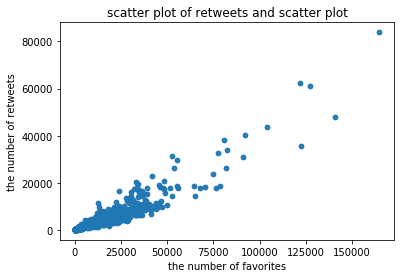

In [63]:
df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('the number of favorites')
plt.ylabel('the number of retweets')
plt.title('scatter plot of retweets and scatter plot')

**as we can see there is a correlation between the number of retweets and the favoirits for every tweet which shows how humans could react more positevly for the tweets or posts that they likes better**

### Insight 3 :

The overall average for ratings is 12/10

In [65]:
df['rating_numerator'].value_counts()

12      1796
10      1676
11      1584
13      1044
9        604
8        380
7        208
14       140
5        132
6        128
3         76
4         64
2         36
1         20
0          8
45         4
84         4
75         4
27         4
50         4
24         4
44         4
60         4
80         4
88         4
121        4
144        4
204        4
420        4
1776       4
26         4
165        4
99         4
143        4
Name: rating_numerator, dtype: int64

**it seems like that the most rate has been given to dogs is 12/10 and also that 10/10 is the most second rate has been given , and we can see that 14/10 has been given for just 140 types of dogs.**